# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [145]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [146]:
data = pd.read_csv('data/unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.


Basic statistics:
             Well         Por        Perm          AI     Brittle         TOC  \
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000   
mean   100.500000   14.991150    4.330750    2.968850   48.161950    0.990450   
std     57.879185    2.971176    1.731014    0.566885   14.129455    0.481588   
min      1.000000    6.550000    1.130000    1.280000   10.940000   -0.190000   
25%     50.750000   12.912500    3.122500    2.547500   37.755000    0.617500   
50%    100.500000   15.070000    4.035000    2.955000   49.510000    1.030000   
75%    150.250000   17.402500    5.287500    3.345000   58.262500    1.350000   
max    200.000000   23.550000    9.870000    4.630000   84.330000    2.180000   

               VR         Prod  
count  200.000000   200.000000  
mean     1.964300  4311.219852  
std      0.300827   992.038414  
min      0.930000  2107.139414  
25%      1.770000  3618.064513  
50%      1.960000  4284.687348  
75%      2.142500  5

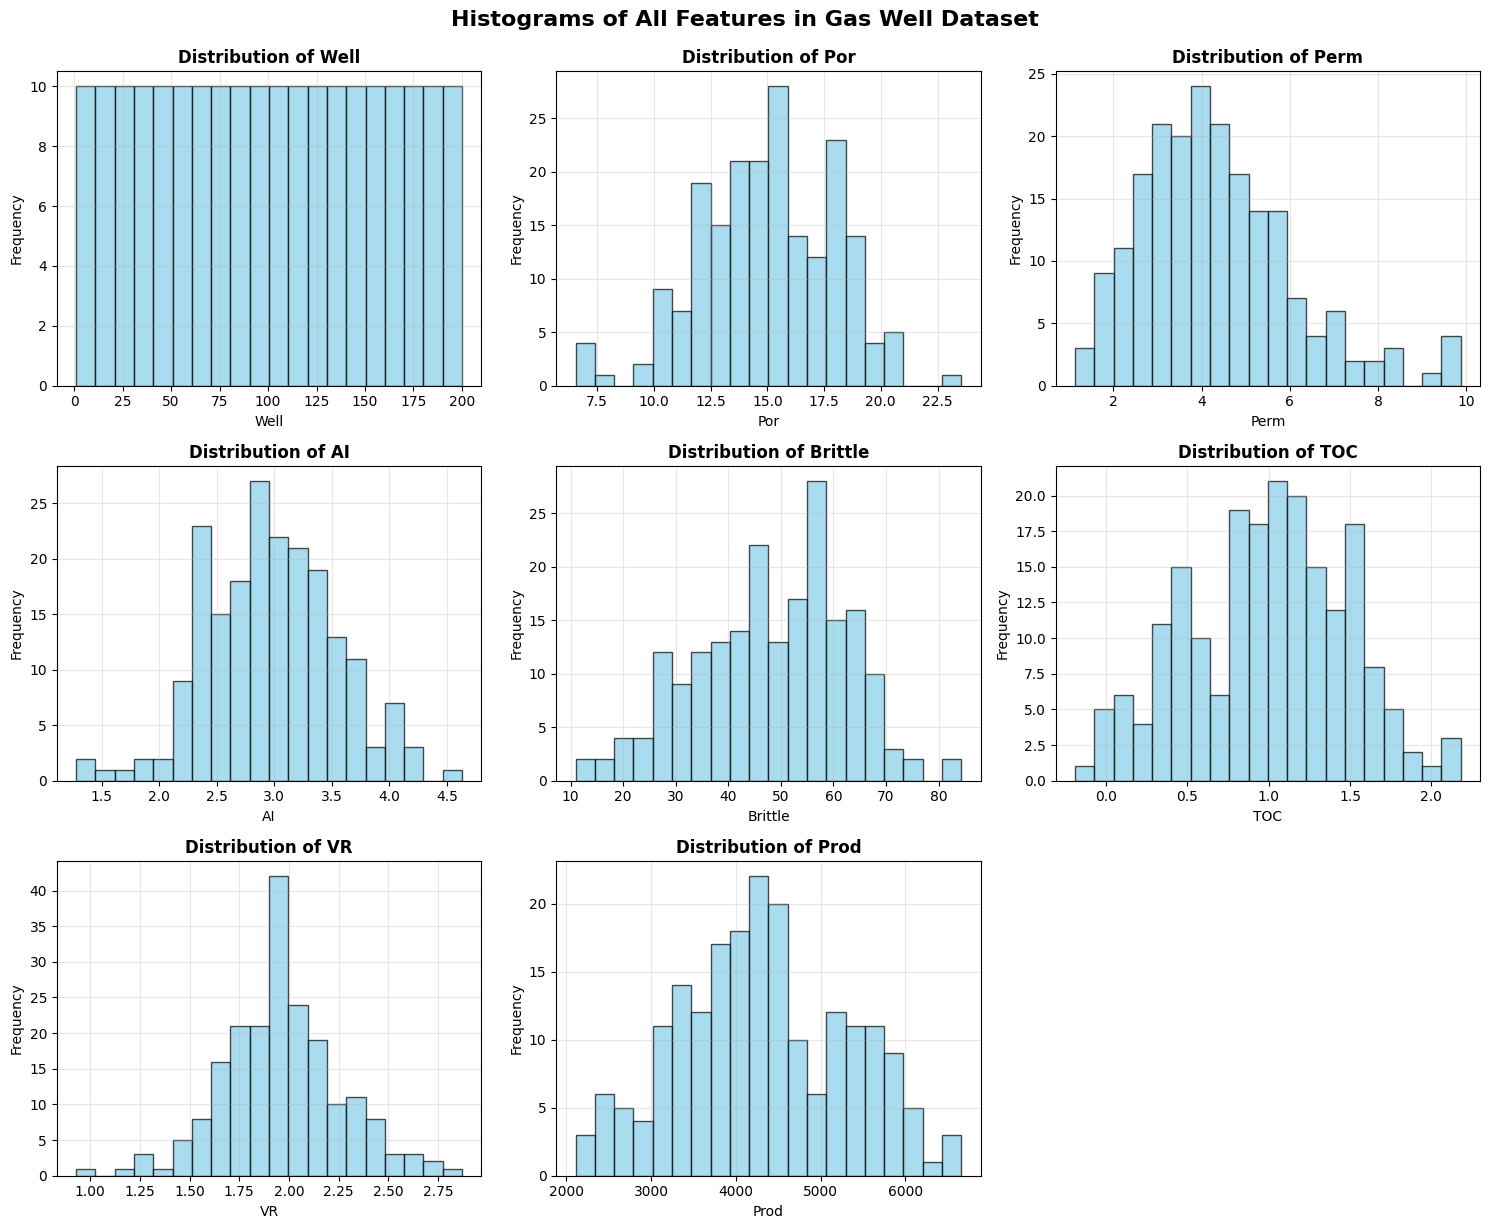

In [147]:
# Ваш код здесь

# Быстрая проверка данных. Проверил на дубликаты и пропуски, все в порядке
# data.isnull().sum()
# print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))
# data = data.drop_duplicates()
# print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

# Build Histograms for all features

print("\nBasic statistics:")
print(data.describe())

# Create histograms for all columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Get all numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

for i, column in enumerate(numeric_columns):
    if i < len(axes):
        axes[i].hist(data[column], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribution of {column}', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Histograms of All Features in Gas Well Dataset', fontsize=16, fontweight='bold', y=1.02)
plt.show()


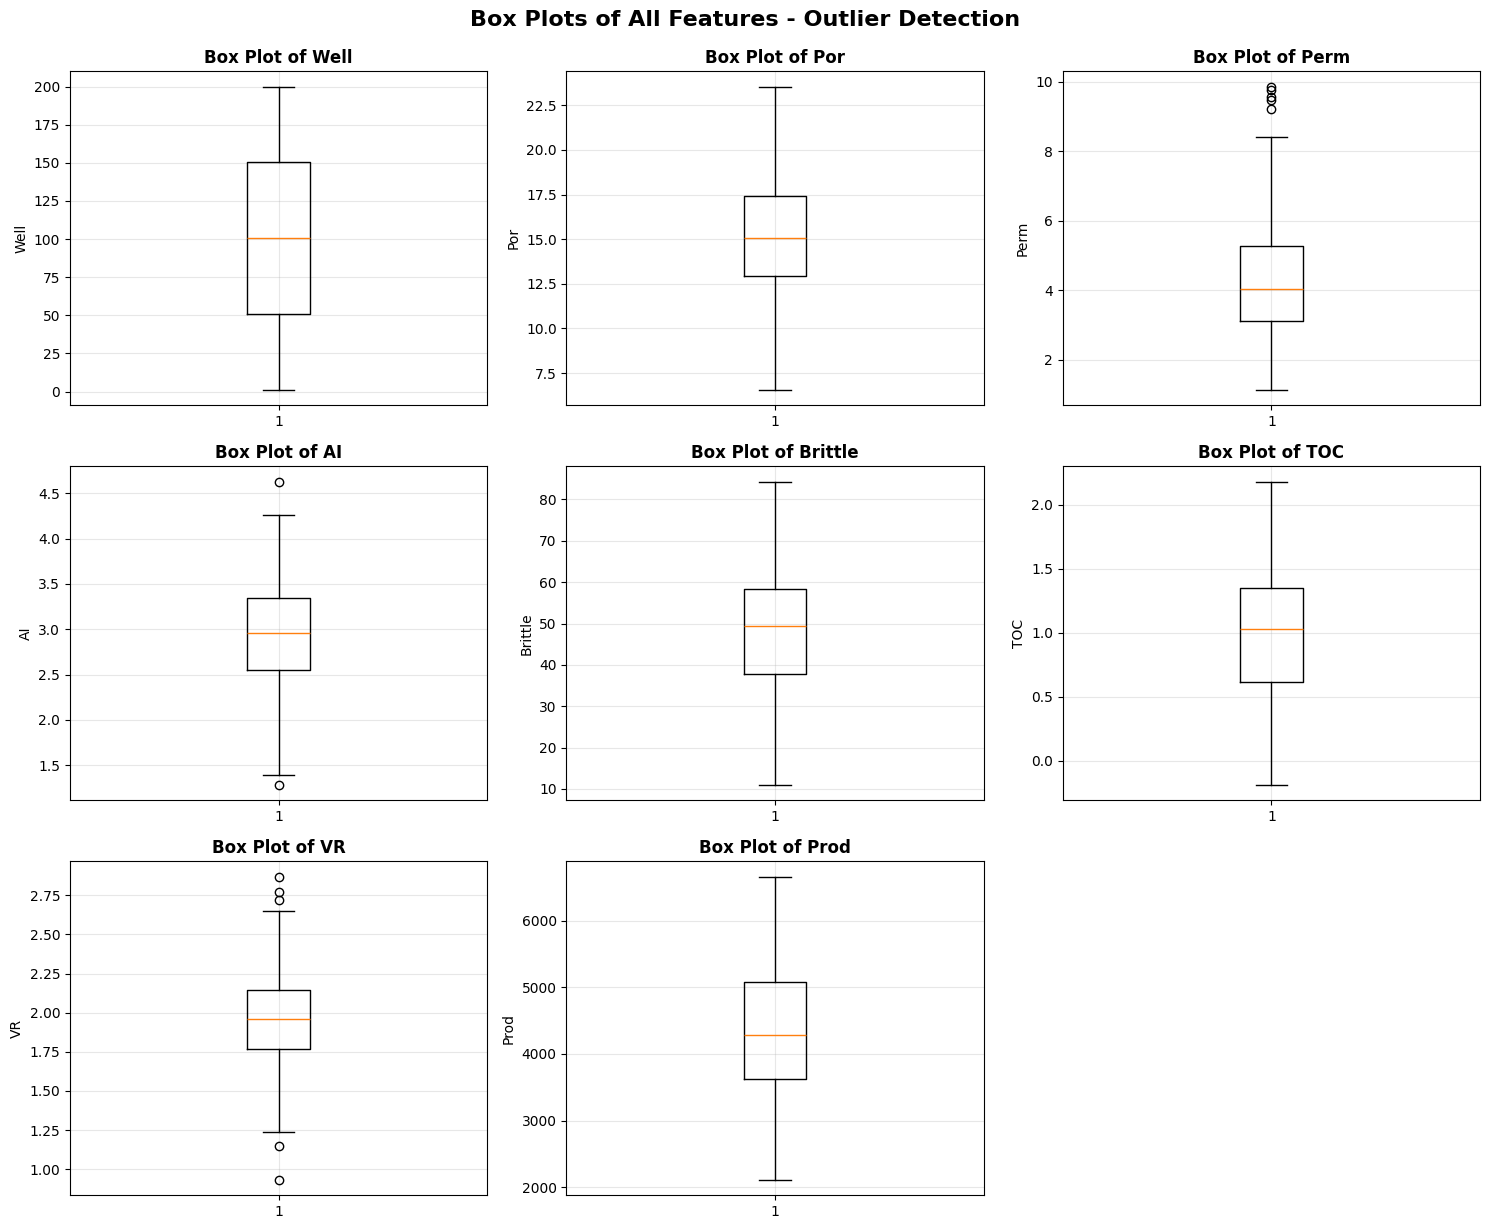

In [148]:
# Box plots for all features to identify outliers and distribution patterns

# Create box plots for all numeric columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Get all numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

for i, column in enumerate(numeric_columns):
    if i < len(axes):
        axes[i].boxplot(data[column])
        axes[i].set_title(f'Box Plot of {column}', fontsize=12, fontweight='bold')
        axes[i].set_ylabel(column)
        axes[i].grid(True, alpha=0.3)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Box Plots of All Features - Outlier Detection', fontsize=16, fontweight='bold', y=1.02)
plt.show()


> #### *предваритeльные выводы по EDA:*
> - *В данных отсутствуют пропуски и дубликаты*
> - *'Well ID' (название скважины не несет никакой смысловой нагрузки и все значения уникальны, этот признак можно сразу удалить)*
> - *Распределения близкие к нормальным, многие со скосами влево или вправо (необходима стандартизация всех признаков)*
> - *Целевая переменная 'Prod' имеет широкий диапазон значений, можно прологарифмировать для снижения асимметрии и потом стандартизировать*
> - *Есть потенциальные выбросы по 'Perm', 'AI', 'VR', можно удалить аномально высокие значения по методу трех сигм*
>   

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).


 матрица Грама (матрица выборочных корреляций) рассчитанная вручную:


,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000



 Ранг матрицы:


np.int64(8)


 Определитель матрицы:


np.float64(0.0007299388072651668)


 Correlation Heatmap (Обычным методом из EDA):


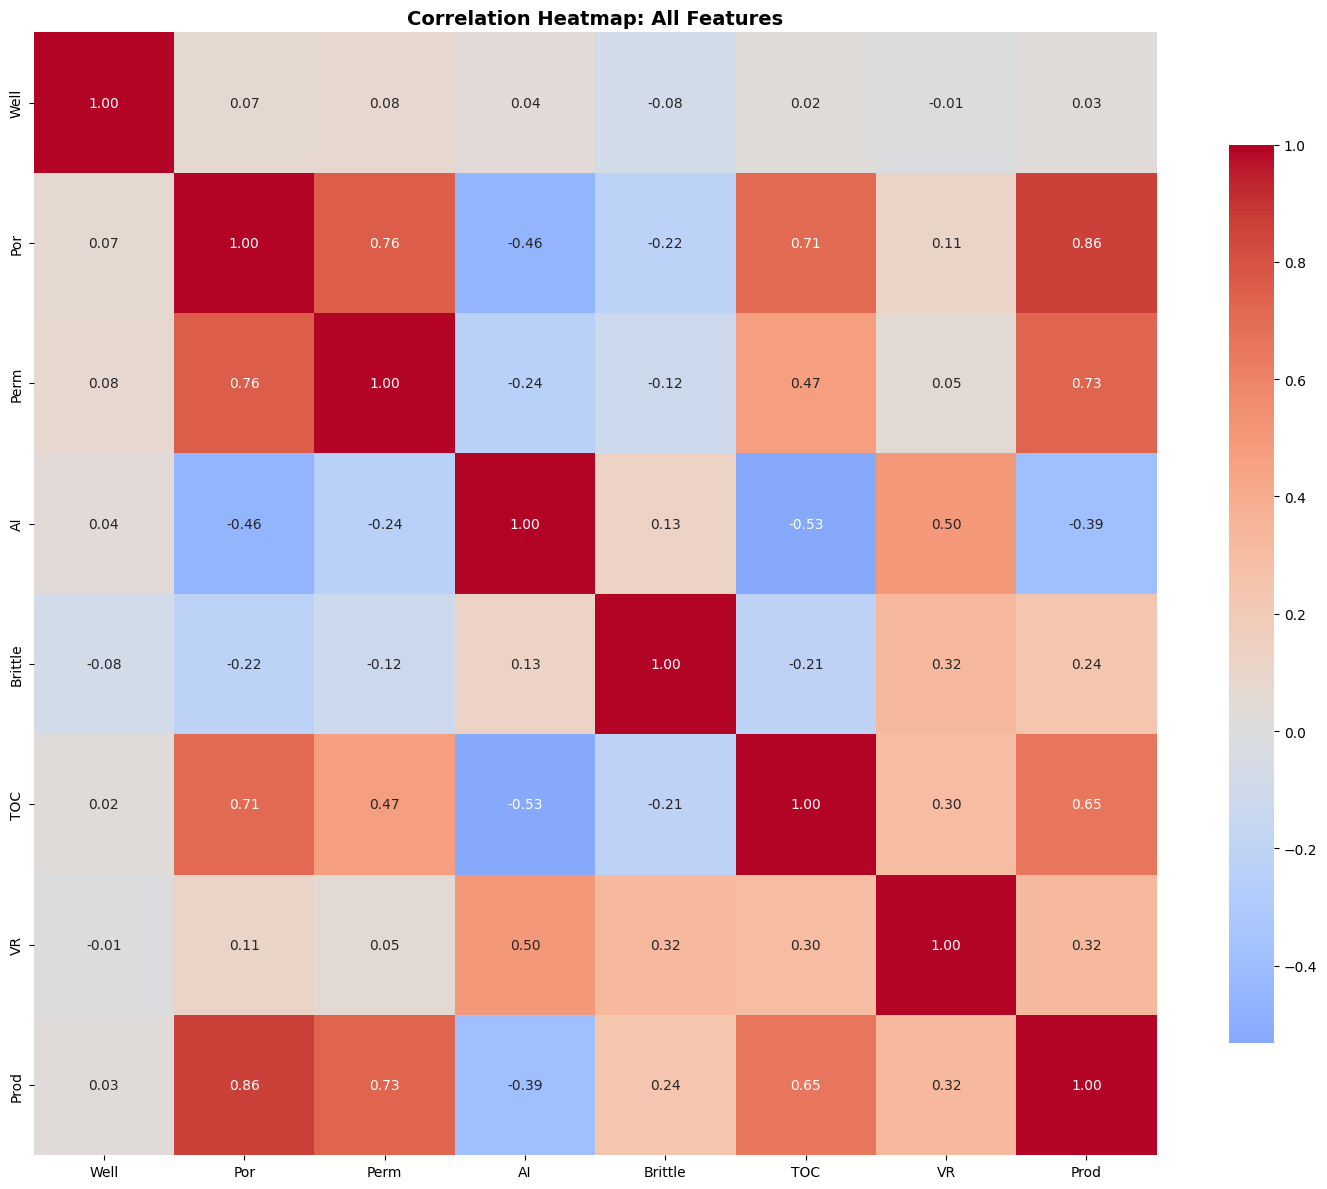


 Топ признаки по корреляции с 'Prod':


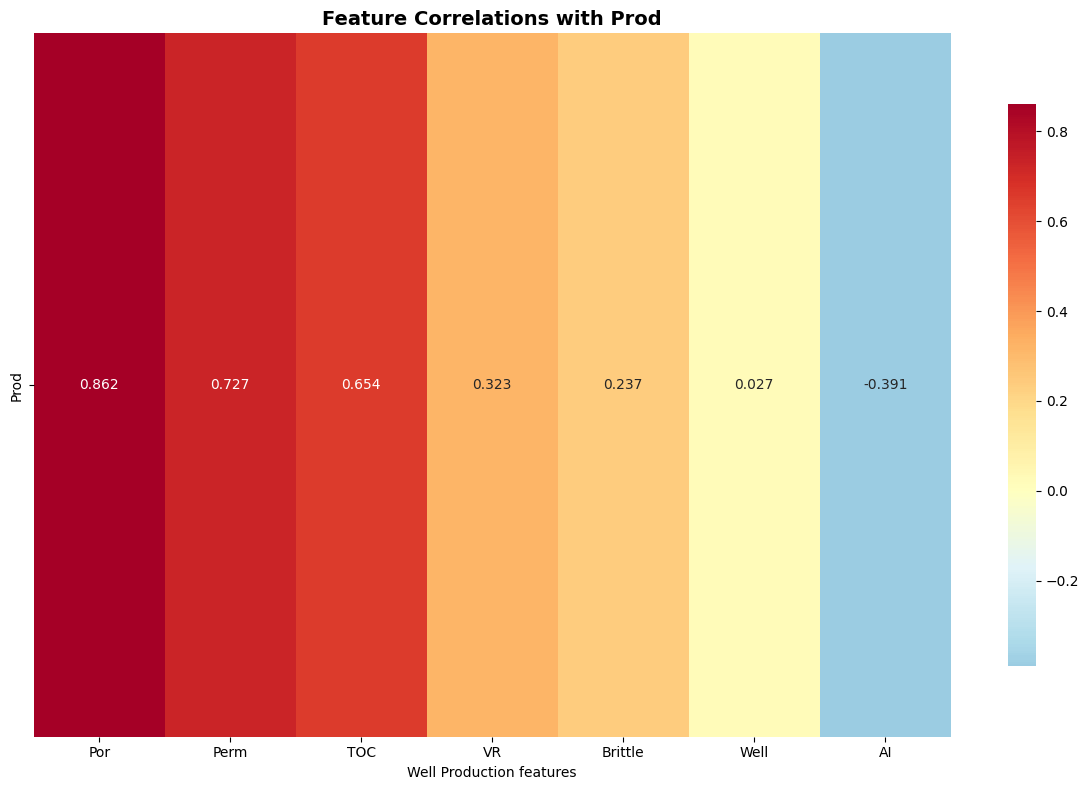

In [149]:
# Ваш код здесь

# delete feature 'Well' from data
# data = data.drop(columns=['Well'])

# Часть №1
# составляем матрицу наблюдений без дополнительного столбца из единиц
A = data[['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR', 'Prod']]

# стандартизируем векторы в столбцах матрицы A
A_cent = A - A.mean(axis=0)
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)

# матрица Грама (матрицу выборочных корреляций)
print("\n матрица Грама (матрица выборочных корреляций) рассчитанная вручную:")
display(A_st.T @ A_st)
print("\n Ранг матрицы:")
display(np.linalg.matrix_rank(A_st.T @ A_st))
print("\n Определитель матрицы:")
display(np.linalg.det(A_st.T @ A_st))

#Часть №2
# heatmap 
print("\n Correlation Heatmap (Обычным методом из EDA):")
plt.figure(figsize=(15, 12))

# all features for correlation matrix
correlation_matrix = data.corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap: All Features', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Also create a heatmap showing correlations with 'Prod'
plt.figure(figsize=(12, 8))
prod_corr = data.corr()['Prod'].sort_values(ascending=False)
top_prod_corr = prod_corr[1:11]  # Exclude 'Prod' itself

# Create a vertical heatmap for top correlations with 'Prod'
print("\n Топ признаки по корреляции с 'Prod':")
prod_corr_df = top_prod_corr.to_frame().T
sns.heatmap(prod_corr_df, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            fmt='.3f',
            cbar_kws={"shrink": .8})

plt.title('Feature Correlations with Prod', 
          fontsize=14, fontweight='bold')
plt.xlabel('Well Production features')
plt.tight_layout()
plt.show()

> *Ваши выводы здесь*
>  
> - *Ранг матрицы максимальный и равен 8, чистой коллинеарности нет. Но определитель близок и стремится к нулю ~0.0007.*
> - *Мультиколлинеарность в данных присутствует. Высокие парные корреляции между некоторыми признаками. Геологические параметры часто взаимосвязаны (пористость-проницаемость) и т.д.*
> - *Матрица плохо обусловлена, определитель очень близок к нулю ~0.0007, При определителе близком к нулю матрица становится почти вырожденной*
> - *Применимость классического МНК - ответ ДА, но он будет неустойчивым*



### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [150]:
# Ваш код здесь

# составляем матрицу наблюдений без дополнительного столбца из единиц
X = data[['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']]
y = data[['Prod']]

# стандартизируем векторы в столбцах матрицы A
X_cent = X - X.mean(axis=0)
X_st = X_cent/np.linalg.norm(X_cent, axis=0)
X_st.describe().round(2)

# стандартизируем вектор целевой переменной
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

# вычислим OLS-оценку для стандартизированных коэффициентов
w_hat_st=np.linalg.inv(X_st.T@X_st)@X_st.T@y_st
print(w_hat_st.values)
print("\n")

# Создаем новый DataFrame с признаками и коэффициентами
feature_names = ['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']
coefficients = w_hat_st.values.flatten()  # Преобразуем в одномерный массив

# Создаем DataFrame
results_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Добавляем абсолютные значения коэффициентов для анализа важности
results_df['Abs_Coefficient'] = np.abs(results_df['Coefficient'])

# Сортируем по убыванию абсолютных значений коэффициентов
results_df = results_df.sort_values('Abs_Coefficient', ascending=False)

print("Результаты линейной регрессии:")
print(results_df)

[[ 0.00295805]
 [ 0.6893915 ]
 [ 0.20282618]
 [-0.20868932]
 [ 0.35599108]
 [-0.03805996]
 [ 0.23812334]]


Результаты линейной регрессии:
   Feature  Coefficient  Abs_Coefficient
1      Por     0.689391         0.689391
4  Brittle     0.355991         0.355991
6       VR     0.238123         0.238123
3       AI    -0.208689         0.208689
2     Perm     0.202826         0.202826
5      TOC    -0.038060         0.038060
0     Well     0.002958         0.002958


> *Ваши выводы здесь*
> 
> Вопросы:
> 1. Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
> - *Да, ранее в процессе EDA было замечено что признак 'Well' название скважины, не несет информативной нагрузки и не влияет на целевую переменную. Коэффициент близок к нулю ~0.00296. Шумовое влияние. Можно удалить.*
> - *'TOC' доля органического углерода, оказывает слабую зависимость на целевую переменную. Не связан с геологией пластов и является признаком углеводородов находящихся в пласте (слабо влияет на продуктивность скважины). Коэф 0.04*
> 
> 2. Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.
> - *Наблюдается сильная прямая зависимость с признаком 'Por' и оказывает сильное влияние на предсказание. Коэффициент 0.68*
> - *'Brittle/ VR/ Perm' прямые линейные зависимости с коэф 0.36, 0.24, 0.20*
> - *'AI' обратная линейная зависимость с коэф -0.21*


### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [151]:
# Ваш код здесь

# Исходные данные
# Предсказание для нового объекта
new_predict_data = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
# Ожидаемый ответ для целевой переменной
prod_true_value = 4748.315024


# Часть 1
# Правильная стандартизация новых данных
feature_order = ['Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']

# Извлекаем значения в правильном порядке
new_predict_array = np.array([new_predict_data[feature] for feature in feature_order])

# Стандартизируем новые данные используя те же параметры, что и для обучающих данных
# 1. Центрируем: вычитаем средние значения из обучающих данных
new_predict_centered = new_predict_array - X.mean(axis=0).values

# 2. Нормализуем: делим на нормы из обучающих данных
new_predict_standardized = new_predict_centered / np.linalg.norm(X_cent, axis=0)

# 3. Делаем предсказание
new_predict_standardized_scale = new_predict_standardized @ w_hat_st.values.flatten()

# 4. Преобразуем предсказание обратно в исходный масштаб
new_predict = new_predict_standardized_scale * np.linalg.norm(y_cent) + y.mean().values[0]

print(f'Предсказание в исходном масштабе (new_predict): {new_predict}')

# Вычисляем абсолютную ошибку
absolute_error = abs(new_predict - prod_true_value)
print(f'Истинное значение: {prod_true_value}')
print(f'Абсолютная ошибка: {absolute_error}')
print(f'Относительная ошибка: {absolute_error / prod_true_value * 100:.2f}%')


# Часть 2
# Предсказания для всего обучающего набора и метрики качества
y_pred_train = X_st @ w_hat_st.values.flatten()

# Нужно обратно преобразовать предсказания в исходный масштаб
y_pred_original_scale = y_pred_train * np.linalg.norm(y_cent) + y.mean().values

# Метрики качества
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(y, y_pred_original_scale)
mape = mean_absolute_percentage_error(y, y_pred_original_scale)

print(f'\nМетрики качества модели на обучающих данных:')
print(f'MAE (Mean Absolute Error): {mae:.2f}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.4f} ({mape*100:.2f}%)')


Предсказание в исходном масштабе (new_predict): 4723.064053707285
Истинное значение: 4748.315024
Абсолютная ошибка: 25.250970292715465
Относительная ошибка: 0.53%

Метрики качества модели на обучающих данных:
MAE (Mean Absolute Error): 153.62
MAPE (Mean Absolute Percentage Error): 0.0363 (3.63%)


> **Выводы по предсказанию:**
> 
> **а) Предсказание для новой скважины:**
> - *Предсказание для скважины составляет 4723.06 млн куб. футов/день*
> - *Абсолютная ошибка предсказания составляет 25.25 млн куб. футов/день при истинном значении 4748.32*
> - *Относительная ошибка составляет ~0.53%, что показывает высокую точность модели*
> - *Стандартизация: сначала центрирование, затем нормализация с теми же параметрами*
> 
> **б) Оценка качества модели:**
> - *Выбранные метрики: MAE = 153.62, MAPE = 3.63%* - для удобства заказчика, интуитивно понятно (абсолютная ошибка и выражена в процентах)
> - *MAE = 153.62 млн куб. футов/день - средняя абсолютная ошибка в единицах целевой переменной*
> - *MAPE = 3.63% - очень хорошая относительная точность, средняя ошибка составляет менее 4%*


### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

Результаты линейной регрессии:
   Feature  Coefficient
1      Por     0.689391
4  Brittle     0.355991
6       VR     0.238123
3       AI    -0.208689
2     Perm     0.202826
5      TOC    -0.038060
0     Well     0.002958


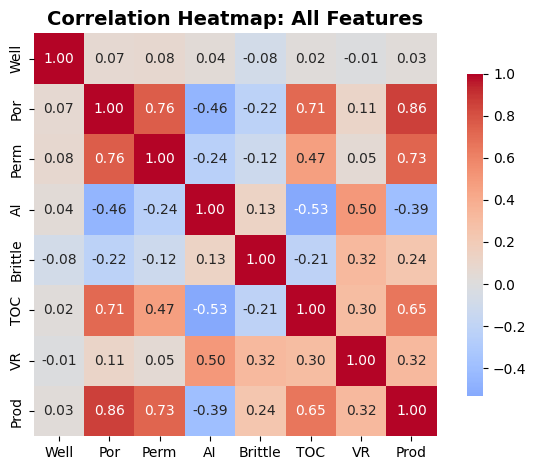

In [152]:
# Ваш код здесь
print("Результаты линейной регрессии:")
print(results_df[['Feature', 'Coefficient']])

# all features for correlation matrix
correlation_matrix = data.corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap: All Features', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

> *Ваши выводы здесь*
> - *Признак 'TOC' коэффициент в модели (-0.038) говорит об обратной линейной зависимости, он противоречит соответствующему коэффициенту корреляции в матрице корреляции (+0.65) который положителен.*
> - *Причина: Мультиколлинеарность между признаками, TOC сильно коррелирует с другими признаками (например, с пористостью 'Por', проницаемостью 'Perm')*
> - *Простая корреляция (+0.65): связь TOC с Prod без учета других факторов*
> - *Коэффициент регрессии (-0.038): влияние TOC на Prod при фиксированных значениях всех остальных признаков.*
> - *Как упоминалось ранее в разделе EDA, я рекомендую удалить признак как мультиколлинеарный для более стабильной работы модели.*

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [161]:
# Ваш код здесь

# TOC -  удалим из-за мультиколлинеарности
# Well - источник шума, не влияет на целевую метрику
 
# составляем матрицу наблюдений без дополнительного столбца из единиц
X = data[['Por', 'Perm', 'AI', 'Brittle', 'VR']]
y = data[['Prod']]

# стандартизируем векторы в столбцах матрицы A
X_cent = X - X.mean(axis=0)
X_st = X_cent/np.linalg.norm(X_cent, axis=0)
X_st.describe().round(2)

# стандартизируем вектор целевой переменной
y_cent = y - y.mean()
y_st = y_cent/np.linalg.norm(y_cent)

# вычислим OLS-оценку для стандартизированных коэффициентов
w_hat_st=np.linalg.inv(X_st.T@X_st)@X_st.T@y_st
print(w_hat_st.values)
print("\n")

# Создаем новый DataFrame с признаками и коэффициентами
feature_names = ['Por', 'Perm', 'AI', 'Brittle', 'VR']
coefficients = w_hat_st.values.flatten()  # Преобразуем в одномерный массив

# Создаем DataFrame
results_df_new = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Добавляем абсолютные значения коэффициентов для анализа важности
results_df_new['Abs_Coefficient'] = np.abs(results_df_new['Coefficient'])

# Сортируем по убыванию абсолютных значений коэффициентов
results_df_new = results_df_new.sort_values('Abs_Coefficient', ascending=False)

print("Коэффициенты линейной регрессии 'До':")
print(results_df[['Feature', 'Coefficient']])
print("\n")
print("Коэффициенты линейной регрессии 'После':")
print(results_df_new[['Feature', 'Coefficient']])


# Предсказания для всего обучающего набора и метрики качества
y_pred_train = X_st @ w_hat_st.values.flatten()

# Нужно обратно преобразовать предсказания в исходный масштаб
y_pred_original_scale = y_pred_train * np.linalg.norm(y_cent) + y.mean().values

# Метрики качества
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

mae = mean_absolute_error(y, y_pred_original_scale)
mape = mean_absolute_percentage_error(y, y_pred_original_scale)

print(f'\nМетрики качества модели на обучающих данных:')
print(f'MAE (Mean Absolute Error): {mae:.2f}')
print(f'MAPE (Mean Absolute Percentage Error): {mape:.4f} ({mape*100:.2f}%)')

[[ 0.68812004]
 [ 0.19697161]
 [-0.1763924 ]
 [ 0.36868612]
 [ 0.20698756]]


Коэффициенты линейной регрессии 'До':
   Feature  Coefficient
1      Por     0.689391
4  Brittle     0.355991
6       VR     0.238123
3       AI    -0.208689
2     Perm     0.202826
5      TOC    -0.038060
0     Well     0.002958


Коэффициенты линейной регрессии 'После':
   Feature  Coefficient
0      Por     0.688120
3  Brittle     0.368686
4       VR     0.206988
1     Perm     0.196972
2       AI    -0.176392

Метрики качества модели на обучающих данных:
MAE (Mean Absolute Error): 153.92
MAPE (Mean Absolute Percentage Error): 0.0363 (3.63%)


> *Ваши выводы здесь*
> 
> 1. Пористость (Por): 0.688 → 0.688
> - *Практически не изменился - остался самым важным фактором*
> - *Интерпретация: Увеличение пористости на 1 стандартное отклонение приводит к увеличению добычи газа на ~0.69 стандартных отклонений*
> - *Геологический смысл: Высокая пористость = больше пространства для газа = выше продуктивность*
> 
> 2. Хрупкость (Brittle): 0.356 → 0.369
> - *Усилился с удалением мультиколлинеарных признаков*
> - *Интерпретация: Коэффициент увеличился на ~3.6%, стал более стабильным*
> - *Геологический смысл: Хрупкие породы лучше поддаются гидроразрыву → выше проницаемость → больше газа*
> 
> 3. Акустический импеданс (AI): -0.209 → -0.176
> - *Ослаб, но остался отрицательным*
> - *Интерпретация: Снижение на 16% по абсолютной величине, связь стала более четкой*
> - *Геологический смысл: Высокий AI часто связан с плотными породами → меньше пор → хуже продуктивность*
> 
> Интерпретация изменений:
> - *Практически идентичные результаты - модель не потеряла в точности*
> - *Потенциальный выбросы (слишком высокие значения Prod в тренировочной выборке) могут влиять на MAE*
> - *Повышена стабильность - убрали "шумовые" признаки*
> - *Улучшена интерпретируемость - коэффициенты стали более надежными*
> - *Снижена сложность - с 7 до 5 признаков*


### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [168]:
# Ваш код здесь

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Используем те же признаки, что и в задании 5.5
X_sklearn = data[['Por', 'Perm', 'AI', 'Brittle', 'VR']]
y_sklearn = data['Prod']

# Стандартизация признаков с помощью StandardScaler
scaler = StandardScaler()
X_sklearn_scaled = scaler.fit_transform(X_sklearn)

# Создание и обучение модели LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_sklearn_scaled, y_sklearn)

# Получение коэффициентов модели
sklearn_coefficients = lr_model.coef_
sklearn_intercept = lr_model.intercept_

print("Коэффициенты модели sklearn (округленные до целого):")
feature_names = ['Por', 'Perm', 'AI', 'Brittle', 'VR']
for feature, coeff in zip(feature_names, sklearn_coefficients):
    print(f"{feature}: {round(coeff)}")
print(f"Intercept: {round(sklearn_intercept)}")

# Прогноз для всего обучающего набора
y_pred_sklearn = lr_model.predict(X_sklearn_scaled)

# Расчет метрик
mae_sklearn = mean_absolute_error(y_sklearn, y_pred_sklearn)
mape_sklearn = mean_absolute_percentage_error(y_sklearn, y_pred_sklearn)

print(f'\nМетрики качества sklearn модели:')
print(f'MAE (sklearn): {mae_sklearn:.2f}')
print(f'MAPE (sklearn): {mape_sklearn:.4f} ({mape_sklearn*100:.2f}%)')

# Сравнение с результатами, полученными вручную
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ:")

print("\nКоэффициенты:")
print("Ручная реализация:")
print(results_df_new[['Feature', 'Coefficient']])

print(f"\nСравнение метрик:")
print(f"MAE  - Ручная: {mae:.2f}, sklearn: {mae_sklearn:.2f}, Разность: {abs(mae - mae_sklearn):.4f}")
print(f"MAPE - Ручная: {mape:.4f}, sklearn: {mape_sklearn:.4f}, Разность: {abs(mape - mape_sklearn):.6f}")

Коэффициенты модели sklearn (округленные до целого):
Por: 681
Perm: 195
AI: -175
Brittle: 365
VR: 205
Intercept: 4311

Метрики качества sklearn модели:
MAE (sklearn): 153.92
MAPE (sklearn): 0.0363 (3.63%)
СРАВНЕНИЕ РЕЗУЛЬТАТОВ:

Коэффициенты:
Ручная реализация:
   Feature  Coefficient
0      Por     0.688120
3  Brittle     0.368686
4       VR     0.206988
1     Perm     0.196972
2       AI    -0.176392

Сравнение метрик:
MAE  - Ручная: 153.92, sklearn: 153.92, Разность: 0.0000
MAPE - Ручная: 0.0363, sklearn: 0.0363, Разность: 0.000000


> **Выводы по сравнению sklearn и ручной реализации:**
> 
> **1. Различия в коэффициентах объясняются:**
> - *Ручная реализация: стандартизированные коэффициенты (безразмерные)*
> - *sklearn реализация: коэффициенты в исходном масштабе признаков*
> - *Это нормальное поведение - разные методы стандартизации дают разные численные значения*
> 
> **2. Идентичность результатов предсказаний:**
> - *MAE: абсолютно идентичные результаты (153.92)*
> - *MAPE: абсолютно идентичные результаты (3.63%)*
> - *Это подтверждает корректность обеих реализаций*
> 
> **Заключение:**
> - *Обе реализации дают идентичные предсказания*
> - *Различия в коэффициентах объясняются разными подходами к стандартизации*


## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [155]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [156]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [157]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [158]:
# Ваш код здесь

> *Ваши выводы здесь*

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [159]:
# Ваш код здесь

> *Ваши выводы здесь*

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [160]:
# Ваш код здесь

> *Ваши выводы здесь*